# Оператор связи "ТелеДом"

## Описание проекта

- Оператор связи «ТелеДом» хочет бороться с оттоком клиентов
- Сотрудники начнут предлагать промокоды и специальные условия всем, кто планирует отказаться от услуг связи
- Для того чтобы заранее находить таких пользователей, нужна модель, которая будет предсказывать, разорвёт ли абонент договор
- Команда оператора располагает персональными данными о некоторых клиентах, информацией об их тарифах и услугах. Ваша задача — обучить на этих данных модель для прогноза оттока клиентов.

## Цели

- Разработать модель МО, которая будет прогнозировать отток клиентов

## Описание услуг

- Основные:
    + Стационарная телефонная связь. Телефон можно подключить к нескольким линиям одновременно.
    + Интернет. Подключение может быть двух типов: через телефонную линию (`DSL`, от англ. digital subscriber line — «цифровая абонентская линия») или оптоволоконный кабель (`Fiber optic`).
- Дополнительные:
    + Интернет-безопасность: антивирус (`DeviceProtection`) и блокировка небезопасных сайтов (`OnlineSecurity`);
    + Выделенная линия технической поддержки (`TechSupport`);
    + Облачное хранилище файлов для резервного копирования данных (`OnlineBackup`);
    + Стриминговое телевидение (`StreamingTV`) и каталог фильмов (`StreamingMovies`).

## Описание данных:
- Необходимая информация хранится в нескольких файлах:
    + `contract_new.csv` — информация о договоре;
    + `personal_new.csv` — персональные данные клиента;
    + `internet_new.csv` — информация об интернет-услугах;
    + `phone_new.csv` — информация об услугах телефонии.

### Файл `contract_new.csv`
- `customerID` — идентификатор абонента;
- `BeginDate` — дата начала действия договора;
- `EndDate` — дата окончания действия договора;
- `Type` — тип оплаты: раз в год-два или ежемесячно;
- `PaperlessBilling` — электронный расчётный лист;
- `PaymentMethod` — тип платежа;
- `MonthlyCharges` — расходы за месяц;
- `TotalCharges` — общие расходы абонента

### Файл `personal_new.csv`
- `customerID` — идентификатор пользователя;
- `gender` — пол;
- `SeniorCitizen` — является ли абонент пенсионером;
- `Partner` — есть ли у абонента супруг или супруга;
- `Dependents` — есть ли у абонента дети.

### Файл `internet_new.csv`
- `customerID` — идентификатор пользователя;
- `InternetService` — тип подключения;
- `OnlineSecurity` — блокировка опасных сайтов;
- `OnlineBackup` — облачное хранилище файлов для резервного копирования данных;
- `DeviceProtection` — антивирус;
- `TechSupport` — выделенная линия технической поддержки;
- `StreamingTV` — стриминговое телевидение;
- `StreamingMovies` — каталог фильмов.

### Файл `phone_new.csv`
- `customerID` — идентификатор пользователя;
- `MultipleLines` — подключение телефона к нескольким линиям одновременно.

## План работы:
- 1. Загрузка данных
- 2. Исследовательский анализ и предобработка данных
- 3. Объединение данных
- 4. Исследовательский анализ и предобработка данных объединённого датафрейма
- 5. Подготовка данных
- 6. Обучение моделей машинного обучения
- 7. Выбор лучшей модели
- 8. Общий вывод и рекомендации заказчику

# Шаг 1. Загрузка данных

- Загрузка библиотек нужных версий

In [ ]:
!pip install -q scikit-learn
!pip install -q shap
!pip install -q matplotlib
!pip install -q seaborn
!pip install -q phik
!pip install -q yellowbrick
!pip install -q xgboost

- Импорт библиотек и инструментов

In [ ]:
# Библиотеки
import pandas as pd
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import phik
import shap
import xgboost
import warnings
#Инструменты из библиотек
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import (StandardScaler, TargetEncoder)
from sklearn.linear_model import (LogisticRegression)
from sklearn.neighbors import KNeighborsClassifier
from yellowbrick.model_selection import FeatureImportances
from sklearn.inspection import permutation_importance
from phik import phik_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from sklearn.metrics import (
                             roc_auc_score,
                             confusion_matrix,
                             roc_curve
                            )

- Для загрузки датасетов воспользуемся конструкцией try - except:

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
#Реализуем функцию для загрузки датасетов и вывода общей информации
def download_dataset(path_loc, path_rem):
    try:
        #Загрузка из локального источника
        dataset = pd.read_csv(path_loc)
    except:
        #Загрузка из удалённого источника
        dataset = pd.read_csv(path_rem)
    print('---------------------------------------------------------')
    dataset.info();
    print('---------------------------------------------------------')
    return dataset

In [ ]:
contract_df = download_dataset('-', 'https://code.s3.yandex.net/datasets/contract_new.csv')
personal_df = download_dataset('-', 'https://code.s3.yandex.net/datasets/personal_new.csv')
internet_df = download_dataset('-','https://code.s3.yandex.net/datasets/internet_new.csv')
phone_df = download_dataset('-', 'https://code.s3.yandex.net/datasets/phone_new.csv')

---------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
---------------------------------------------------------
---------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0  

- Выведем краткую информацию о распределении числовой величины `MonthlyCharges` датасета contract_df
- Тип данных столбца `SeniorCitizen` необходимо преобразовать в `object`, т.к. он несёт информацию только о том, является человек пенсионером, т.е. является категориальным, а не числовым

In [ ]:
contract_df.describe()

,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


### Выводы:
- Информация из датасетов успешно загружена
- При поверхностном осмотре данных пропусков не найдено
- Датасеты имеют разное количество строк. В датасетах `contract_df` и `personal_df` одинаковое число строк, в то время как в остальных датасетах - различное
- Необходимо скорректировать регистр названий столбцов, а также исправить тип данных определённых столбцов

# Шаг 2. Исследовательский анализ и предобработка данных

## Предобработка

- Преобразуем названия столбцов к нижнему регистру

In [ ]:
#Функция для добавления нижних подчёркиваний
def add_underscore(word):
    result = word[0]
    for letter in word[1:]:
        if letter.isupper():
            result += f'_{letter}'
        else:
            result += letter
    return result

In [ ]:
#Функция для преобразования названий столбцов к удобному виду
def column_names_correct(arr):
    for i in range(len(arr)):
        if arr[i] == 'customerID':
            arr[i] = 'customer_id'
        elif arr[i] == 'StreamingTV':
            arr[i] = 'streaming_tv'
        else:
            arr[i] = add_underscore(arr[i])
        arr[i] = arr[i].lower()
    return arr

In [ ]:
#Функция для просмотра содержания столбцов с категориальными данными
def show_info(dataset):
    for column in dataset.columns:
        print('---------------------------------------------------------')
        print(dataset[column].sort_values(ascending = True).unique());
    print('---------------------------------------------------------')

In [ ]:
contract_df.columns = column_names_correct(contract_df.columns.tolist())
print(contract_df.columns)

Index(['customer_id', 'begin_date', 'end_date', 'type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges'],
      dtype='object')


In [ ]:
personal_df.columns = column_names_correct(personal_df.columns.tolist())
print(personal_df.columns)

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents'], dtype='object')


In [ ]:
internet_df.columns = column_names_correct(internet_df.columns.tolist())
print(internet_df.columns)

Index(['customer_id', 'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies'],
      dtype='object')


In [ ]:
phone_df.columns = column_names_correct(phone_df.columns.tolist())
print(phone_df.columns)

Index(['customer_id', 'multiple_lines'], dtype='object')


- Названия столбцов приведены к нижнему регистру

- Преобразуем тип данных столбца `senior_citizen` к строкам, `total_charges` к числу с плавающей точкой, заменив "пробелы" на 0, а также исправим тип данных столбцов `begin_date`, `end_date` на даты. При этом в последнем столбце 'No' заменим на текущую для периода исследования дату, попутно создав столбец с информацией о том, действует ли договор

In [ ]:
personal_df['senior_citizen'].unique()

array([0, 1])

In [ ]:
personal_df['senior_citizen'] = personal_df['senior_citizen'].astype('str')
personal_df['senior_citizen'] = personal_df['senior_citizen'].replace({'1' : 'Yes',
                                                                       '0' : 'No'
                                                                      })

In [ ]:
personal_df['senior_citizen'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
#Подсчёт числа действующих договоров
contract_df['end_date'].loc[contract_df['end_date'] == 'No'].count()

5942

In [ ]:
#Подсчёт числа строк с пропуском(пробелом) в столбце с общими расходами
contract_df['total_charges'].loc[contract_df['total_charges'] == ' '].count()

11

- Заменим пробелы в столбце `total_charges` на 0, т.к. их небольшое число. На этапе исследовательского анализа данных можно заполненить эти значения на медианное или похожее решение

In [ ]:
#Создание столбца, показывающего действует ли договор
contract_df['active'] = contract_df['end_date'].apply(lambda x: 'Yes' if x == 'No' else 'No')

#Замена даты окончания договора для действующих договоров на текущую дату
contract_df['end_date'] = contract_df['end_date'].replace({'No' : '2020-02-01'})

#Присвоение для ' ' столбца total_charges 0
contract_df['total_charges'] = contract_df['total_charges'].replace({' ' : '0'})
contract_df['total_charges'] = contract_df['total_charges'].astype('float')

In [ ]:
#Замена типа данных на дату
contract_df['begin_date'] = pd.to_datetime(contract_df['begin_date'], yearfirst = True)
contract_df['end_date'] = pd.to_datetime(contract_df['end_date'], yearfirst = True)

In [ ]:
contract_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   float64       
 8   active             7043 non-null   object        
dtypes: datetime64[ns](2), float64(2), object(5)
memory usage: 495.3+ KB


- Проверим содержание категориальных столбцов

- Тип данных столбцов исправлен и корректно преобрезован
- Проверим содержание столбцов датасетов с категориальными данными

In [ ]:
show_info(contract_df.drop(columns = ['monthly_charges']))
show_info(personal_df)
show_info(internet_df)
show_info(phone_df)

---------------------------------------------------------
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
---------------------------------------------------------
['2013-10-01T00:00:00.000000000' '2013-11-01T00:00:00.000000000'
 '2013-12-01T00:00:00.000000000' '2014-01-01T00:00:00.000000000'
 '2014-02-01T00:00:00.000000000' '2014-03-01T00:00:00.000000000'
 '2014-04-01T00:00:00.000000000' '2014-05-01T00:00:00.000000000'
 '2014-06-01T00:00:00.000000000' '2014-07-01T00:00:00.000000000'
 '2014-08-01T00:00:00.000000000' '2014-09-01T00:00:00.000000000'
 '2014-10-01T00:00:00.000000000' '2014-11-01T00:00:00.000000000'
 '2014-12-01T00:00:00.000000000' '2015-01-01T00:00:00.000000000'
 '2015-02-01T00:00:00.000000000' '2015-03-01T00:00:00.000000000'
 '2015-04-01T00:00:00.000000000' '2015-05-01T00:00:00.000000000'
 '2015-06-01T00:00:00.000000000' '2015-07-01T00:00:00.000000000'
 '2015-08-01T00:00:00.000000000' '2015-09-01T00:00:00.000000000'
 '2015-10-01T00:00:

In [ ]:
contract_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   float64       
 8   active             7043 non-null   object        
dtypes: datetime64[ns](2), float64(2), object(5)
memory usage: 495.3+ KB


- Проверим описание столбца `total_charges`

In [ ]:
contract_df['total_charges'].describe()

count    7043.000000
mean     2115.312885
std      2112.742814
min         0.000000
25%       436.750000
50%      1343.350000
75%      3236.690000
max      9221.380000
Name: total_charges, dtype: float64

In [ ]:
contract_df.loc[contract_df['total_charges'] == 0.]

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,active
488,4472-LVYGI,2020-02-01,2020-02-01,Two year,Yes,Bank transfer (automatic),52.55,0.0,Yes
753,3115-CZMZD,2020-02-01,2020-02-01,Two year,No,Mailed check,20.25,0.0,Yes
936,5709-LVOEQ,2020-02-01,2020-02-01,Two year,No,Mailed check,80.85,0.0,Yes
1082,4367-NUYAO,2020-02-01,2020-02-01,Two year,No,Mailed check,25.75,0.0,Yes
1340,1371-DWPAZ,2020-02-01,2020-02-01,Two year,No,Credit card (automatic),56.05,0.0,Yes
3331,7644-OMVMY,2020-02-01,2020-02-01,Two year,No,Mailed check,19.85,0.0,Yes
3826,3213-VVOLG,2020-02-01,2020-02-01,Two year,No,Mailed check,25.35,0.0,Yes
4380,2520-SGTTA,2020-02-01,2020-02-01,Two year,No,Mailed check,20.00,0.0,Yes
5218,2923-ARZLG,2020-02-01,2020-02-01,One year,Yes,Mailed check,19.70,0.0,Yes
6670,4075-WKNIU,2020-02-01,2020-02-01,Two year,No,Mailed check,73.35,0.0,Yes


- Видно, что люди с "пробелами" в общих расходах являются вновь заключившими договора, поэтому было разумно строки столбца `total_charges` заполнить нулями

- На этапе проверки содержания столбцов не было выявлено пропусков. Тем не менее выполним проверку на пропуски в датасетах

In [ ]:
contract_df.isna().sum()

customer_id          0
begin_date           0
end_date             0
type                 0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
active               0
dtype: int64

In [ ]:
personal_df.isna().sum()

customer_id       0
gender            0
senior_citizen    0
partner           0
dependents        0
dtype: int64

In [ ]:
internet_df.isna().sum()

customer_id          0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
dtype: int64

In [ ]:
phone_df.isna().sum()

customer_id       0
multiple_lines    0
dtype: int64

- Пропуски отсутствуют

- Проверим датасеты на наличие дубликатов

In [ ]:
contract_df.duplicated().sum()

0

In [ ]:
personal_df.duplicated().sum()

0

In [ ]:
internet_df.duplicated().sum()

0

In [ ]:
phone_df.duplicated().sum()

0

### Выводы по предобработке:
- Предобработка данных выполнена
- Названия столбцов приведены к нижним регистрам
- Типы данных столбцов исправлены
- Пропуски и дубликаты отсутствуют

## Исследовательский анализ данных

- Построим круговые диаграммы для категориальных признаков
- Гистограммы и диаграммы размаха для количественных признаков

In [ ]:
# функция для построения гистограмм
def hist_build(df, column, hist_color, xlabel, ylabel, title, i, j, quant_of_bins, more_than_one_row):
    if more_than_one_row:
        axes[i, j].set_title(title)
        axes[i, j].hist(df[column], bins = quant_of_bins, color = hist_color)
        axes[i, j].set_xlabel(xlabel)
        axes[i, j].set_ylabel(ylabel)
    else:
        axes[j].set_title(title)
        axes[j].hist(df[column], bins = quant_of_bins, color = hist_color)
        axes[j].set_xlabel(xlabel)
        axes[j].set_ylabel(ylabel)

In [ ]:
# Функция для построения ящиков с усами
def boxplot_build(df, column, xlabel, title, i, j, left_lim, right_lim):
    axes[i, j].boxplot(df[[column]], vert = False)
    axes[i, j].set_title(title)
    axes[i, j].set_xlabel(xlabel)
    axes[i, j].set_xlim(left_lim, right_lim)

In [ ]:
# Функиця для построения круговых диаграмм
def pie_build(df, column, support_column, title, i, j, one_pie):
    if one_pie:
        df_column = df.pivot_table(index = column, values = support_column, aggfunc = ['count'])
        df_column.columns = ['quantity']
        df_column['quantity'] = df_column['quantity'] / df[column].count()
        ax.set_title(title);
        ax.pie(df_column['quantity'], autopct='%1.1f%%');
        ax.legend(
        bbox_to_anchor = (1.0, 1.0),
        loc = 'upper left', labels = df_column.index);
    else:
        df_column = df.pivot_table(index = column, values = support_column, aggfunc = ['count'])
        df_column.columns = ['quantity']
        df_column['quantity'] = df_column['quantity'] / df[column].count()
        axes[i, j].set_title(title);
        axes[i, j].pie(df_column['quantity'], autopct='%1.1f%%');
        axes[i, j].legend(
        bbox_to_anchor = (1.0, 1.0),
        loc = 'upper left', labels = df_column.index);

### Анализ признаков датасета  `contract_df`

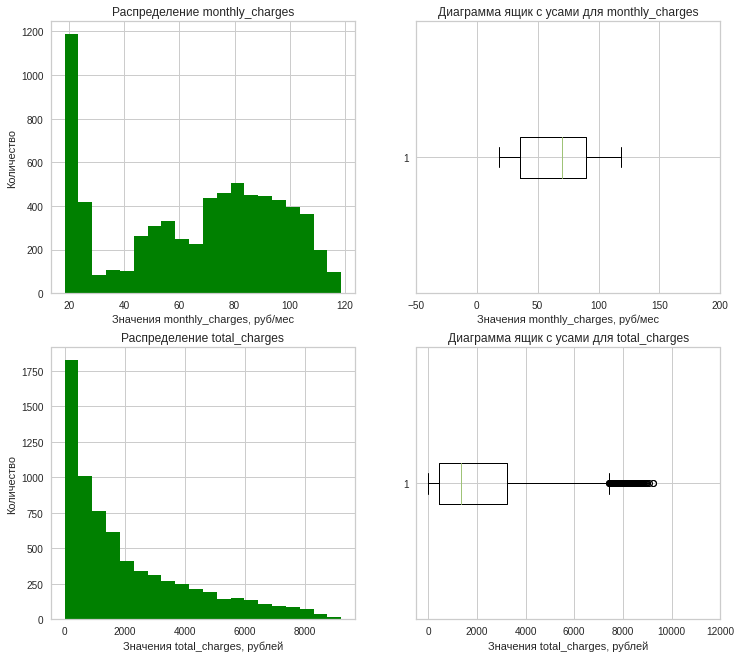

In [ ]:
# Выбор столбцов с числовыми признаками
num_columns = ['monthly_charges', 'total_charges']
# Установка параметров распределений и гистограмм
param_quant_of_bins = [20, 20]
param_lim_left = [-50, -500]
param_lim_right = [200, 12000]
i = 0
# Построение графиков
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 11))
for column in num_columns:
    if column == 'monthly_charges':
        value_shape = 'руб/мес'
    else:
        value_shape = 'рублей'
    hist_build(contract_df,
               column,
               'green',
               'Значения ' + column + ', ' + value_shape,
               'Количество',
               'Распределение ' + column,
               i,
               0,
               param_quant_of_bins[i],
               True
              )

    boxplot_build(contract_df,
                  column,
                  'Значения ' + column + ', ' + value_shape,
                  'Диаграмма ящик с усами для ' + column ,
                  i,
                  1,
                  param_lim_left[i],
                  param_lim_right[i]
                 )
    i += 1

- В количественном признаке `monthly_charges` отсутствуют выбросы и аномалии. При этом распределение данных специфическое. Можно выделить три наиболее крупных категории по месячной оплате за услуги связи:
    + от 20 до 40 руб/мес
    + от 40 до 70 руб/мес
    + более 70 руб/мес
- На диаграмме размаха для признака `total_charges` видно наличие выбросов в виде очень больших общих сумм затрат на связь. Но удалять их нецелесообразно, т.к. они несильно выбиваются из общего распределения

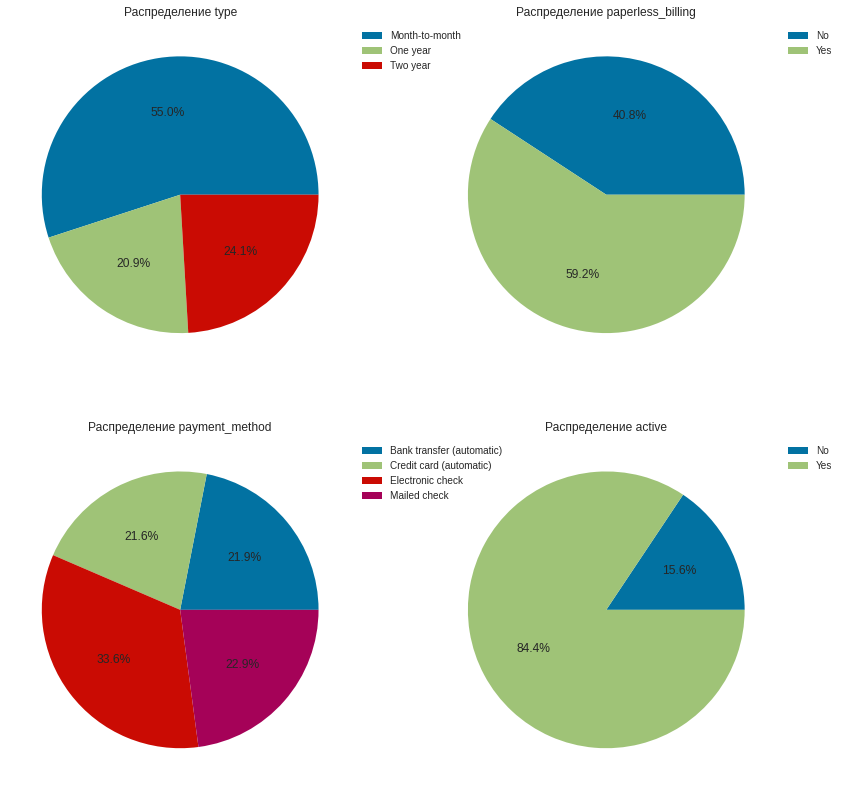

In [ ]:
# Отбор категориальных признаков датасета contract_df
cat_columns = ['type', 'paperless_billing', 'payment_method', 'active']
# Построение круговых диаграмм
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (14, 14))
i = 0
for column in cat_columns:
   pie_build(contract_df, column, 'customer_id', 'Распределение ' + column, i // 2, i % 2, False)
   i += 1

- Больше половины клиентов оплачивают счета каждый месяц. Остальные предпочитают оплачивать счета раз в год или два года - 24 % и 21 % соответственно
- Целевой признак `active` распределён неравномерно. Большее число клиентов ещё пользуются услугами компании - 84 %, остальные 16 % - нет. При обучении модели МО необходимо учесть этот факт, задав стратификацию

- Анализ признаков датасета `personal_df`

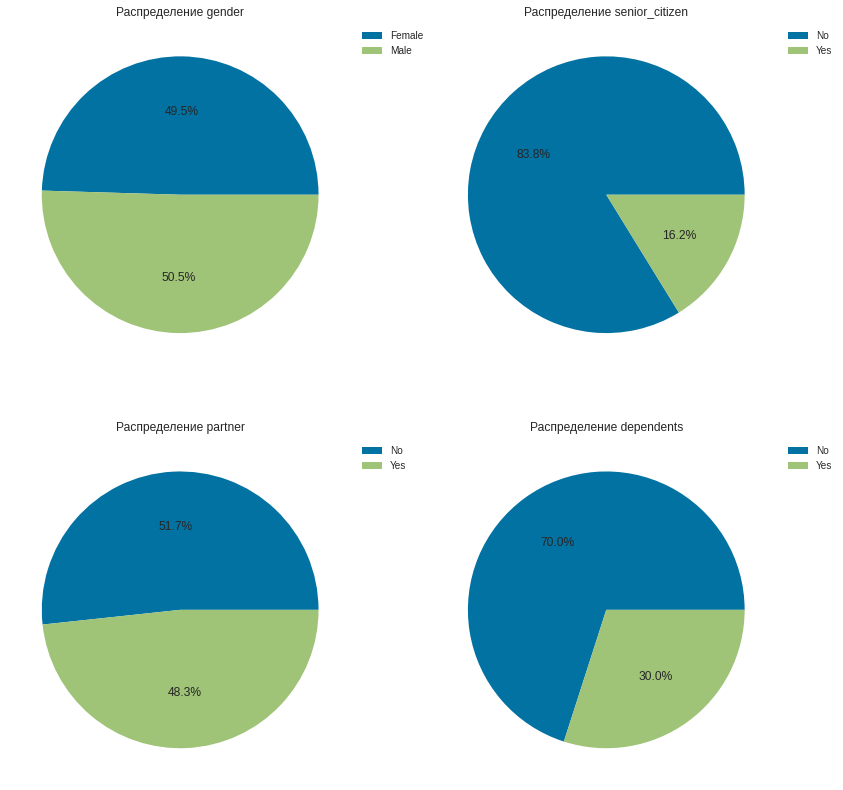

In [ ]:
# Отбор категориальных признаков датасета personal_df
cat_columns = ['gender', 'senior_citizen', 'partner', 'dependents']
# Построение круговых диаграмм
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (14, 14))
i = 0
for column in cat_columns:
   pie_build(personal_df, column, 'customer_id', 'Распределение ' + column, i // 2, i % 2, False)
   i += 1

- Количество мужчин и женщин среди клиентов примерно одинаковое
- Пожилые люди составляют 16% от общего числа клиентов
- Чуть меньше половины из представленных абоненентов состоят в браке
- Только у 30% клиентов есть дети

- Анализ признаков датасета `internet_df`

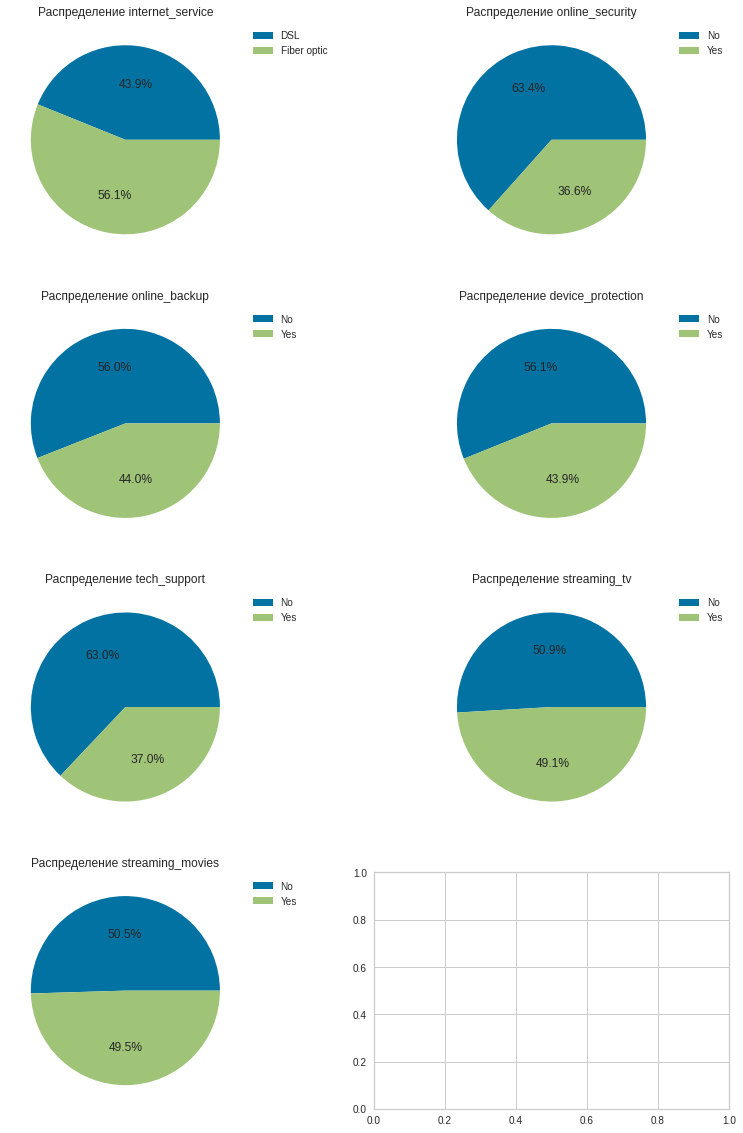

In [ ]:
# Отбор категориальных признаков датасета internet_df
cat_columns = ['internet_service',
               'online_security',
               'online_backup',
               'device_protection',
               'tech_support',
               'streaming_tv',
               'streaming_movies']
# Построение круговых диаграмм
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (14, 20))
i = 0
for column in cat_columns:
   pie_build(internet_df, column, 'customer_id', 'Распределение ' + column, i // 2, i % 2, False)
   i += 1

- В большинстве своём клиенты подключают интернет через оптоволоконный кабель(`Fiber optic`) - `56%`, остальные `44%` -  через телефонную линию (`DSL`)
- Услуги `streaming_tv`(стриминговое телевидение) и `streaming_movies`(стриминговые фильмы) являются наиболее популярными - этими услугами пользуются около `49%` клиентов
- Далее следуют услуги `device_protection` (антивирус) и `online_backup` (облачное хранилище файлов для резервного копирования данных) - данные услуги приобретают `44%` клиентов
- Наименее востребованными услугами являются `OnlineSecurity`(блокировка опасных сайтов) и `TechSupport`(выделенная линия технической поддержки) - ими пользуются около `37%` клиентов

- Анализ признаков датасета `phone_df`

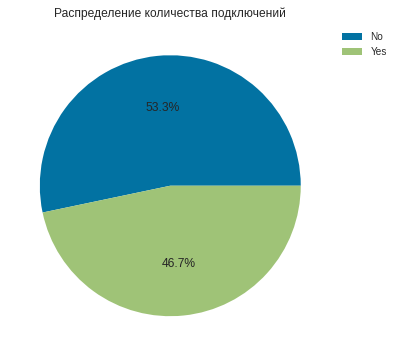

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (6, 6))
pie_build(phone_df, 'multiple_lines', 'customer_id', 'Распределение ' + 'количества подключений', 0, 0, True)

- Датасет `phone_df` содержит около 6000 записей
- От этого числа клиентов только `47%` пользуются подключением к нескольким линиям (`multiple_lines`) одновременно

### Выводы исследовательскому анализу данных:
- Первичный осмотр данных проведён
- В датасете были обнаружены выбросы, но данных не так много, тем более выбросы несильно выделяются из общего распределения данных, поэтому целесообразно их оставить

# Шаг 3. Объединение данных

- Объединять датасеты будем по столбцу `customer_id`
- В методе merge укажем, чтобы включались строки из наиболее полного датасета, т.е. `contract_df` и `personal_df`

- Результат объединения датасетов `contract_df` и `personal_df` при помощи параметров `inner` и `outer` даёт одинаковый результат по размерностям итогового датасета. Следовательно, значения стобца `customer_id` полностью совпадают
- Объединим датасеты `contract_df` и `personal_df` при помощи метода `merge` по столбцу `customer_id`, указав how = `'left'`, чтобы вошли только те клиенты, о которых обязательно есть информация в датасете `contract_df`

In [ ]:
# Объединение contract_df и personal_df
dataset = contract_df.merge(personal_df, on = 'customer_id', how = 'left')
dataset.isna().sum()

customer_id          0
begin_date           0
end_date             0
type                 0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
active               0
gender               0
senior_citizen       0
partner              0
dependents           0
dtype: int64

In [ ]:
dataset.shape

(7043, 13)

- Объединение прошло успешно

In [ ]:
# Объединение dataset и internet_df
dataset = dataset.merge(internet_df, on = 'customer_id', how = 'outer')
dataset.isna().sum()

customer_id             0
begin_date              0
end_date                0
type                    0
paperless_billing       0
payment_method          0
monthly_charges         0
total_charges           0
active                  0
gender                  0
senior_citizen          0
partner                 0
dependents              0
internet_service     1526
online_security      1526
online_backup        1526
device_protection    1526
tech_support         1526
streaming_tv         1526
streaming_movies     1526
dtype: int64

In [ ]:
dataset.shape

(7043, 20)

- Датасет `internet_df` содержит меньше строк по сравнению с предыдущими, поэтому закономерно появление пропусков в итоговом датасете `dataset`

- Присоединим последний датасет `phone_df`

In [ ]:
# Объединение dataset и phone_df
dataset = dataset.merge(phone_df, on = 'customer_id', how = 'outer')
dataset.isna().sum()

customer_id             0
begin_date              0
end_date                0
type                    0
paperless_billing       0
payment_method          0
monthly_charges         0
total_charges           0
active                  0
gender                  0
senior_citizen          0
partner                 0
dependents              0
internet_service     1526
online_security      1526
online_backup        1526
device_protection    1526
tech_support         1526
streaming_tv         1526
streaming_movies     1526
multiple_lines        682
dtype: int64

In [ ]:
dataset.shape

(7043, 21)

- Как и в предыдущем случае объединения в присоединённом столбце присутствуют пропуски

- Датасет с данными из 4 - х датасетов успешно получен
- Анализом пропусков и их заполнением в итоговом датасете займёмся в следующем шаге

# Шаг 4. Исследовательский анализ и предобработка данных объединённого датафрейма

### Предобработка данных

- Содержание столбцов было проверено для каждого датасета в отдельности, поэтому нет надобности в очередной проверке цельного датасета
- Посмотрим, в чём причина пропусков в некоторых столбцах
- Для этого введём столбец, показывающий длительность договоров

In [ ]:
dataset['days'] = (dataset['end_date'] - dataset['begin_date']).dt.days

In [ ]:
dataset['days'].loc[dataset['internet_service'].isna()].describe()

count    1526.000000
mean      859.627785
std       690.391022
min         0.000000
25%       245.000000
50%       702.000000
75%      1432.000000
max      2191.000000
Name: days, dtype: float64

In [ ]:
ds_check = dataset.loc[dataset['internet_service'].isna()]

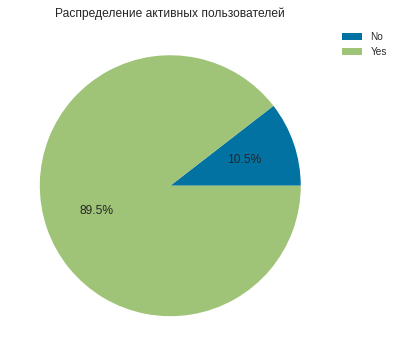

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (6, 6))
pie_build(ds_check, 'active', 'customer_id', 'Распределение ' + 'активных пользователей', 0, 0, True)

- Пропуски в столбце `multiple_lines` разумно заполнить значениями `No phone`, т.к. вероятно у этих клиентов физически нет телефона, чтобы воспользоваться услугами компании
- Остальные пропуски в столбцах заполним значением `No`

In [ ]:
dataset['multiple_lines'] = dataset['multiple_lines'].fillna('No phone')

In [ ]:
dataset = dataset.fillna('No')

In [ ]:
dataset.isna().sum()

customer_id          0
begin_date           0
end_date             0
type                 0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
active               0
gender               0
senior_citizen       0
partner              0
dependents           0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
multiple_lines       0
days                 0
dtype: int64

- Пропуски успешно заполнены

In [ ]:
columns_na = ['internet_service',
              'online_security',
              'online_backup',
              'device_protection',
              'tech_support',
              'streaming_tv',
              'streaming_movies',
              'multiple_lines'
             ]
for column in columns_na:
    print(f'Уникальные значения столбца {column} после заполнения пропусков : {dataset[column].sort_values(ascending = True).unique()}')

Уникальные значения столбца internet_service после заполнения пропусков : ['DSL' 'Fiber optic' 'No']
Уникальные значения столбца online_security после заполнения пропусков : ['No' 'Yes']
Уникальные значения столбца online_backup после заполнения пропусков : ['No' 'Yes']
Уникальные значения столбца device_protection после заполнения пропусков : ['No' 'Yes']
Уникальные значения столбца tech_support после заполнения пропусков : ['No' 'Yes']
Уникальные значения столбца streaming_tv после заполнения пропусков : ['No' 'Yes']
Уникальные значения столбца streaming_movies после заполнения пропусков : ['No' 'Yes']
Уникальные значения столбца multiple_lines после заполнения пропусков : ['No' 'No phone' 'Yes']


- Все операции по предобработке данных выполнены, перейдем к исследовательскому анализу данных
- Найдём инсайты в данных, а также отберём признаки для модели МО, построив матрицу корреляции

### Исследовательский анализ данных

- Удалим даты, т.к. их смысловая информация была конвертирована в признаки `days`(длительность договора в днях) и `active`(действует ли договор)
- Удалим столбец `customer_id`, т.к. это идентификационный ключ аккаунта клиента

In [ ]:
dataset = dataset.drop(['begin_date', 'end_date', 'customer_id'], axis = 1)

- Добавим целевой признак `outflow`(уход клиента)

In [ ]:
dataset['outflow'] = dataset['active'].apply(lambda x: 0 if x == 'Yes' else 1)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type               7043 non-null   object 
 1   paperless_billing  7043 non-null   object 
 2   payment_method     7043 non-null   object 
 3   monthly_charges    7043 non-null   float64
 4   total_charges      7043 non-null   float64
 5   active             7043 non-null   object 
 6   gender             7043 non-null   object 
 7   senior_citizen     7043 non-null   object 
 8   partner            7043 non-null   object 
 9   dependents         7043 non-null   object 
 10  internet_service   7043 non-null   object 
 11  online_security    7043 non-null   object 
 12  online_backup      7043 non-null   object 
 13  device_protection  7043 non-null   object 
 14  tech_support       7043 non-null   object 
 15  streaming_tv       7043 non-null   object 
 16  streaming_movies   7043 

- Посмотрим на ежемесячные траты действующих и ушедших клиентов

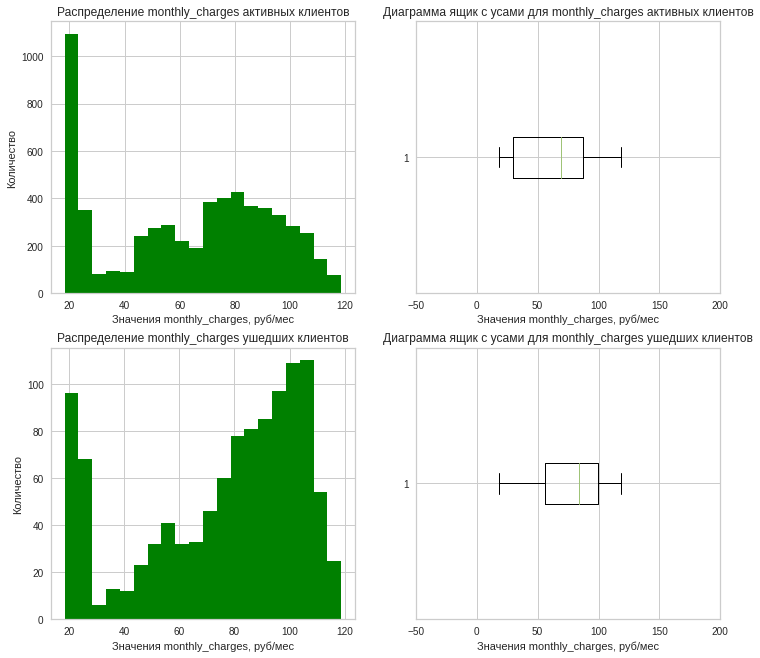

In [ ]:
# Выбор столбцов с числовыми признаками
column = 'monthly_charges'
# Установка параметров распределений и гистограмм
param_quant_of_bins = 20
param_lim_left = -50
param_lim_right = 200
active = ['Yes', 'No']
title = [' активных', ' ушедших']
# Траты в месяц
# Посроение графиков
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 11))
for i in range(2):
    value_shape = 'руб/мес'
    hist_build(dataset.loc[dataset['active'] == active[i]],
               column,
               'green',
               'Значения ' + column + ', ' + value_shape,
               'Количество',
               'Распределение ' + column + title[i] + ' клиентов',
               i,
               0,
               param_quant_of_bins,
               True
              )

    boxplot_build(dataset.loc[dataset['active'] == active[i]],
                  column,
                  'Значения ' + column + ', ' + value_shape,
                  'Диаграмма ящик с усами для ' + column + title[i] + ' клиентов',
                  i,
                  1,
                  param_lim_left,
                  param_lim_right
                 )

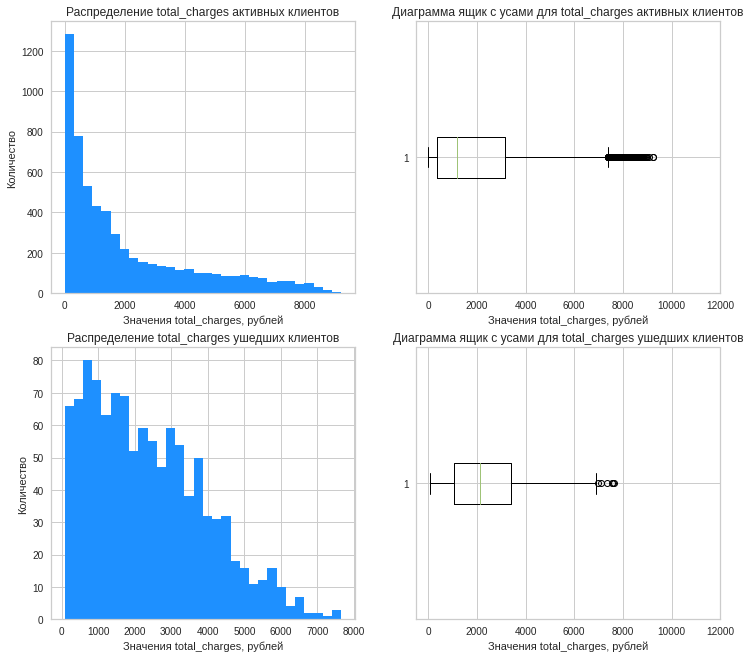

In [ ]:
# Выбор столбцов с числовыми признаками
column = 'total_charges'
# Установка параметров распределений и гистограмм
param_quant_of_bins = 30
param_lim_left = -500
param_lim_right = 12000

# Общие траты
# Посроение графиков
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 11))
for i in range(2):
    value_shape = 'рублей'
    hist_build(dataset.loc[dataset['active'] == active[i]],
               column,
               'dodgerblue',
               'Значения ' + column + ', ' + value_shape,
               'Количество',
               'Распределение ' + column + title[i] + ' клиентов',
               i,
               0,
               param_quant_of_bins,
               True
              )

    boxplot_build(dataset.loc[dataset['active'] == active[i]],
                  column,
                  'Значения ' + column + ', ' + value_shape,
                  'Диаграмма ящик с усами для ' + column + title[i] + ' клиентов',
                  i,
                  1,
                  param_lim_left,
                  param_lim_right
                 )

- Сравнение трат действующих и ушедших клиентов будем проводить в относительных величинах, т.к. значения по осям ординат(количества людей) отлично на порядок
- Среди ушедших клиентов наблюдается большее число людей, использующих более дорогие тарифы(ежемесячные траты)
- Медианное же значение ежемесячных трат незначительно выше, чем у действующих клиентов
- С общими расходами присутствует похожая ситуация:
    + Среди ушедших клиентов большее число людей с высокими значениями общих расходов
    + На диаграмме размаха это отчётливо видно различие медианного значения в виде 2200 рублей для ушедших клиентов и 1200 рублей для действующих
- Вероятно ушедших клиентов могло не устроить увеличение тарифного плана на используемые услуги

- Посмотрим длительность договоров действующих и ушедших клиентов

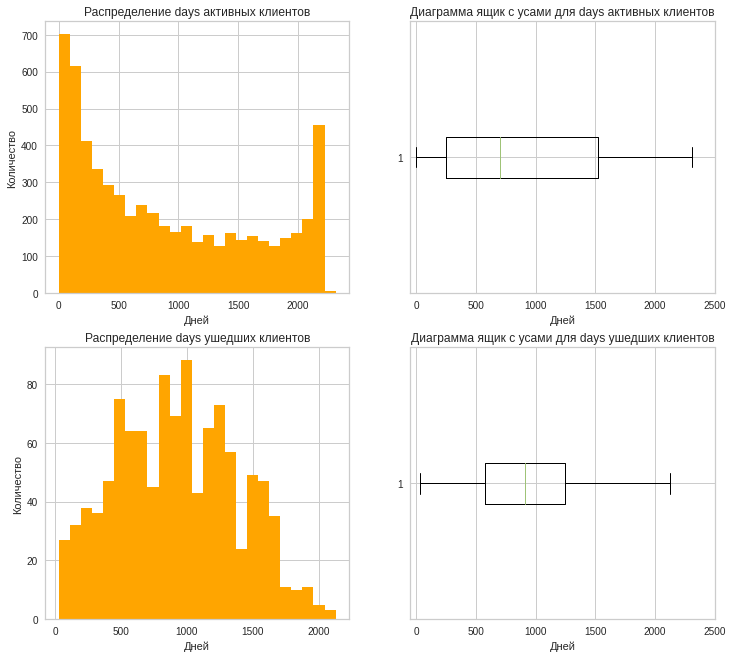

In [ ]:
# Выбор столбцов с числовыми признаками
column = 'days'
# Установка параметров распределений и гистограмм
param_quant_of_bins = 25
param_lim_left = -50
param_lim_right = 2500

# Общие траты
# Посроение графиков
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 11))
for i in range(2):
    hist_build(dataset.loc[dataset['active'] == active[i]],
               column,
               'orange',
               'Дней',
               'Количество',
               'Распределение ' + column + title[i] + ' клиентов',
               i,
               0,
               param_quant_of_bins,
               True
              )

    boxplot_build(dataset.loc[dataset['active'] == active[i]],
                  column,
                  'Дней',
                  'Диаграмма ящик с усами для ' + column + title[i] + ' клиентов',
                  i,
                  1,
                  param_lim_left,
                  param_lim_right
                 )

- По графикам видно, что за последний год пришло много новых клиентов
- Медианное значение длительности договоров действующих клиентов 650 дней(около 1.8 лет), в то время как у ушедших 900 дней (или 2.5 года)

- Построим матрицу корреляций при помощи библиотеки phik, указав числовые признаки в interval_cols

In [ ]:
interval_cols = ['monthly_charges',
                 'total_charges',
                 'days']

In [ ]:
dataset = dataset.drop(['active'], axis = 1)

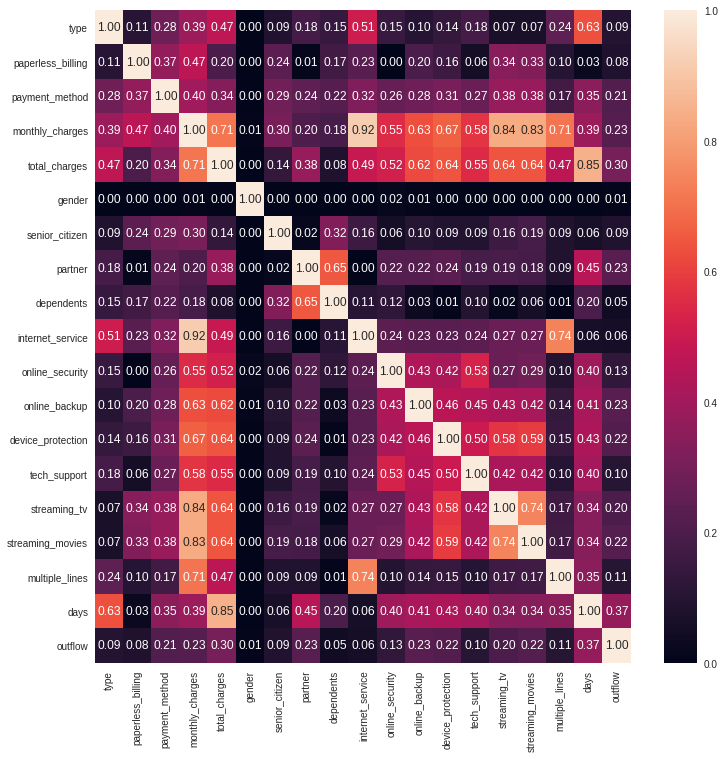

In [ ]:
matrix_corr = phik_matrix(dataset, interval_cols = interval_cols);
fig, ax = plt.subplots(figsize = (12, 12));
sns.heatmap(matrix_corr, annot = True, fmt='.2f');

- Мультиколлинеарность наблюдается между признаками `internet_service` и `monthly_charges`, что неудивительно, ведь у каждого тарифа есть определённая стоимость, что и способствует возникновению высокой связи (признак `internet_service` уберём из - за низкой корреляции)
- Более 0.3 : `days`, `total_charges`
- От 0.2 до 0.3 : `payment_method`, `monthly_charges`, `partner`, `online_backup`, `device_protection`, `streaming_tv`, `streaming_movies`
- От 0.1 до 0.2 : `online_security`, `tech_support`, `multiple_lines`
- Менее 0.1 : `type`, `paperless_billing`, `gender`, `senior_citizen`, `dependents`, `internet_service`

# Шаг 5. Подготовка данных

- Создадим пайплайн для обучения нескольких моделей МО(в данной задаче предсказываем категориальный признак)

In [ ]:
# Зададим константы
RANDOM_STATE = 28102024
TEST_SIZE = 0.25

- К количественным признакам отнесём : `monthly_charges`, `total_charges`, `days`
- К категориальным : `payment_method`, `partner`, `online_security`, `online_backup`, `device_protection`, `tech_support`, `streaming_tv`, `streaming_movies`, `multiple_lines`
- Целевой признак : `outflow`

- Количественные признаки отмасштабируем при помощи `StandardScaler`
- Категориальные признаки закодируем при помощи `TargetEncoder`

In [ ]:
# Разделение датасета
X = dataset.drop(['outflow',
                  'internet_service'], axis = 1)
y = dataset['outflow']

- Применим стратификацию, т.к. целевой признак несбалансирован

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state = RANDOM_STATE,
                                                      stratify = y)

In [ ]:
# Объявим категеориальные и количественные признаки
target_columns = [
                'multiple_lines',
                'payment_method',
                'partner',
                'online_security',
                'online_backup',
                'device_protection',
                'tech_support',
                'streaming_tv',
                'streaming_movies',
                'type',
                'paperless_billing',
                'gender',
                'senior_citizen',
                'dependents'
              ]

num_columns = [
                'monthly_charges',
                'total_charges',
                'days'
              ]

In [ ]:
# SimpleImputer + TargetEncoder
target_pipe = Pipeline(
    [
        (
            'simpleImputer',
             SimpleImputer(missing_values = 'No', strategy = 'constant')
        ),
        (
            'target',
             TargetEncoder()
        )
    ]
)

In [ ]:
# Пайплайн для кодирования и масштабирования данных
data_preprocessor = ColumnTransformer(
    transformers = [
                     ('target', target_pipe, target_columns),
                     ('num', StandardScaler(), num_columns)
                   ],
    remainder = 'passthrough'
)

- Так как предсказываемый признак `outflow` категориальный, воспользуемся классификационными моделями, а именно:
    + Логистическая регрессия `LogisticRegression`
    + Модель градиентного бустинга `XGBoostClassifier`

In [ ]:
# Словарь для GridSearchCV модели XGBoost
param_grid_xg = [
             {
                # Описание XGBoost
                 'models' : [XGBClassifier(random_state = RANDOM_STATE, scale_pos_weight = 0.7, objective = 'binary:logistic')],
                 'models__eta': [0.01, 0.05, 0.1],
                 'models__booster': ['gbtree', 'gblinear'],
                 'models__min_child_weight':range(3, 5),
                 'models__max_depth':range(3, 5),
                 'models__learning_rate': [0.2, 0.05, 0.04, 0.1],
                 'models__n_estimators':range(500, 501, 100)
             }
]

In [ ]:
# Словарь для GridSearchCV модели LogisticRegression
param_grid_lg = [
             {
                # Описание LogisticRegression
                 'models':[LogisticRegression(random_state = RANDOM_STATE)],
                 'models__C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                 'models__penalty':['l1', 'l2', 'elasticnet', 'none'],
                 'models__solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
             }
]

# Шаг 6. Обучение моделей машинного обучения

In [ ]:
#Функция для построения матрицы ошибок
def confusion_m(model, title):
    cm = confusion_matrix(y_test, model.predict(X_test))
    f, ax = plt.subplots(figsize = (5, 5))
    sns.heatmap(cm, annot = True, linewidths = 0.5, color = 'red', fmt = '.0f', ax = ax)
    plt.xlabel('y_predicted')
    plt.ylabel('y_true')
    plt.title(title)
    plt.show()

In [ ]:
#Создание цельного пайплайна из предобработки и самого обучения
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', XGBClassifier(random_state = RANDOM_STATE, scale_pos_weight = 0.7, objective = 'binary:logistic'))
])

In [ ]:
# Обучим и найдём лучшую модель LogisticRegression при помощи инструмента автоматизированного поиска GridSearchCV
grid_search_lg = GridSearchCV(
                        pipe_final,
                        param_grid = param_grid_lg,
                        cv = 5,
                        scoring = 'roc_auc',
                        n_jobs = -1)

grid_search_lg.fit(X_train, y_train)
print('Лучшая модель LogisticRegression и её гиперпараметры:\n\n', grid_search_lg.best_params_)

Лучшая модель LogisticRegression и её гиперпараметры:

 {'models': LogisticRegression(random_state=28102024), 'models__C': 1.0, 'models__penalty': 'l1', 'models__solver': 'saga'}


In [ ]:
# Обучим и найдём лучшую модель XGBoost при помощи инструмента автоматизированного поиска GridSearchCV
grid_search_xg = GridSearchCV(
                        pipe_final,
                        param_grid = param_grid_xg,
                        cv = 5,
                        scoring = 'roc_auc',
                        n_jobs = -1)

grid_search_xg.fit(X_train, y_train)
print('Лучшая модель XGBoost и её гиперпараметры:\n\n', grid_search_xg.best_params_)

[17:45:44] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:48:53] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:52:06] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:55:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [ ]:
best_xg = grid_search_xg.best_estimator_
result_xg = round(grid_search_xg.best_score_, 3)
print(f'Значение метрики ROC-AUC на кросс - валидации по тренировочной выборке для лучшей модели XGBoost: {result_xg}')


Значение метрики ROC-AUC на кросс - валидации по тренировочной выборке для лучшей модели XGBoost: 0.872


In [ ]:
best_lg = grid_search_lg.best_estimator_
result_lg = round(grid_search_lg.best_score_, 3)
print(f'Значение метрики ROC-AUC на кросс - валидации по тренировочной выборке для лучшей модели LogisticRegression: {result_lg}')


Значение метрики ROC-AUC на кросс - валидации по тренировочной выборке для лучшей модели LogisticRegression: 0.754


- Лучшей моделью оказался градиентный бустинг XGBoost
- Метрика ROC-AUC оказалась выше 0.85 на тренировочной и валидационной выборках, как и требуется по условию задачи
- Проверим в следующем шаге качество модели, а также посмотрим влияние признаков на принятие решения моделью

# Шаг 7. Выбор лучшей модели

In [ ]:
# Функция для построения графика с важностью признаков
def feature_importance(model, features_names):
    dataframe = pd.DataFrame(model, features_names).reset_index()
    dataframe = dataframe.rename(columns = {'index':'features', 0:'coefficients'})
    dataframe = dataframe.sort_values(by = 'coefficients', ascending = False)
    plt.figure(figsize=(13,10), dpi= 60)
    ax = sns.barplot(x = 'coefficients', y = 'features', data = dataframe ,palette = 'husl')
    plt.title('Feature importance', fontsize = 20)

In [ ]:
y_pred = best_xg.predict_proba(X_test)[:, 1]

In [ ]:
print('Метрика ROC-AUC лучшей модели XGBoost на тестовой выборке:', round(roc_auc_score(y_test, y_pred), 3))

Метрика ROC-AUC лучшей модели XGBoost на тестовой выборке: 0.899


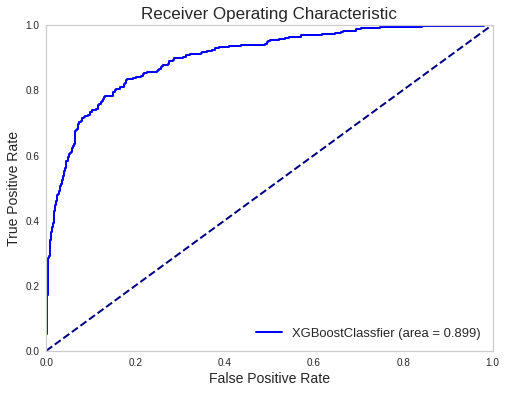

In [ ]:
# Построим ROC - кривую для лучшей модели
plt.figure(figsize=(8,6))
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

#fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color = 'blue',
        lw = 2, label = 'XGBoostClassfier (area = %0.3f)' % roc_auc_score(y_test, y_pred))

plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize= 14)
plt.ylabel('True Positive Rate', fontsize = 14)
plt.title('Receiver Operating Characteristic', fontsize = 17)
plt.legend(loc = 'lower right', fontsize = 13)
plt.grid()
plt.show()

- На промежутке FPR от 0 до 0.1 качество модели быстро растёт (TPR)
- При значениях FPR более 0.3 модель уже не получает значительного прироста в качестве и допускает всё больше ошибок, часто присваивая значения FP, что недопустимо в рамках модели по поиску клиентов, которые потенциально могут уйти

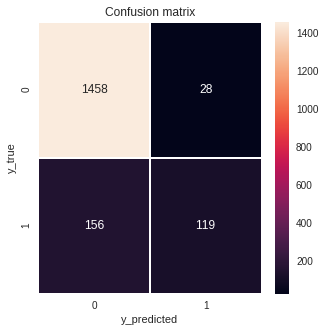

In [ ]:
confusion_m(best_xg, 'Confusion matrix')

- Модель работает чётко, но допускает сравнительно много ошибок типа FN, что приведёт к нахождению не всех клиентов, которые потенциально могут отказаться от услуг организации

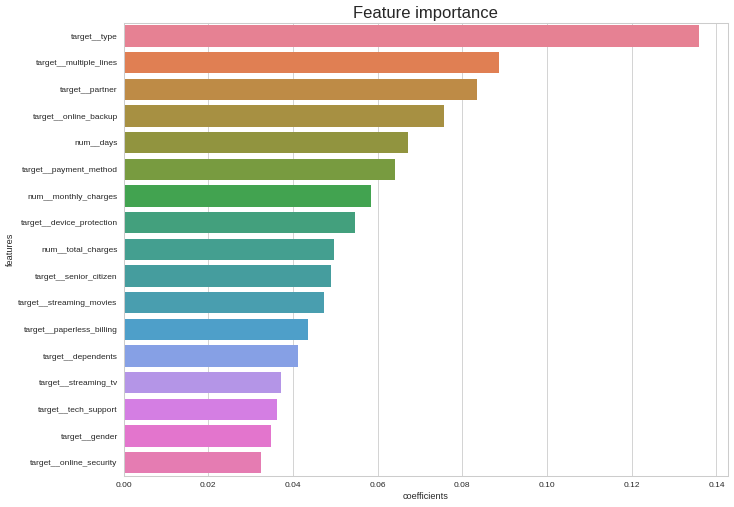

In [ ]:
X_train_new = data_preprocessor.fit_transform(X_train, y_train)
X_test_new = data_preprocessor.transform(X_test)
feature_names = best_xg.named_steps['preprocessor'].get_feature_names_out()
feature_importance(best_xg.named_steps["models"].feature_importances_, feature_names)

- Значительный вклад в принятие решения моделью оказался признак `type`, далее следует `multiple_lines` и тройку самых важных признаков завершает `online_backup`
- Признаки `partner`, `device_protection`, `total_charges`, `days` и `payment_method` оказывают примерно одинаковый вклад на конечное решение и умеренно влияют на поведение модели. К этому списку ещё можно добавить `monthly_charges`
- Остальные признаки, связанные с типами оказываемых услуг и личной информацией о клиенте, не очень важны для модели

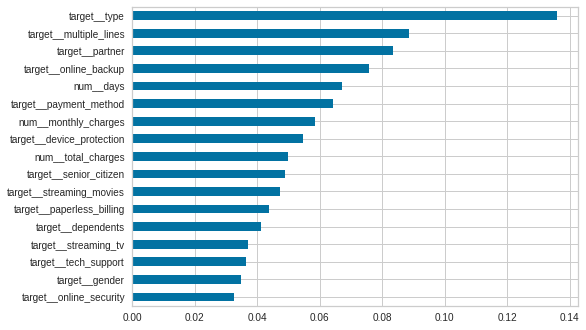

In [ ]:
# код ментора для проверки
tmp_feature_importance = pd.Series(best_xg[-1].feature_importances_, index=best_xg[:-1].get_feature_names_out())
tmp_feature_importance.sort_values(ascending=True).plot.barh();
del tmp_feature_importance

# Шаг 8. Общий вывод и рекомендации заказчику

### Общий вывод:
- В ходе решения поставленной задачи была выбрана модель градиентного бустинга `XGBoost`. Модель показала хорошие результаты и соответствует требованиям заказчика
- Время обучения модели минимально, что позволяет оптимально использовать временные ресурсы
- Хоть метрика ROC-AUC высока, модели всё равно тяжело находить всех клиентов, которые потенциально могут уйти, из - за их малого количества

### Рекомендации заказчику:
- Cледует подробнее изучить вопрос с процессом оплаты(`type`). Пересмотреть интервалы оплаты или уровень цен, т.к. в ходе исследования это оказалось наиболее критичным фактором, способствующим уходу клиентов
- Нужно пересмотреть процесс использования людьми нескольких линий связи, услуги `multiple_lines`. Возможно клиенты недовольны качеством предоставляемой услуги или другими факторами, связанными с нею
- Сбои в функционировании облачного хранилища `online_backup` или его небольшой объём памяти может быть причиной отказа от услуг, так что необходимо посмотреть отзывы клиентов касаемо этой услуги и возможно принять какие - то меры
- Важно не забывать про клиентов, которые пользуются услугами на протяжении нескольких лет. Как вариант, предлагать им скидки на услуги или дополнительные услуги, которые их могут заинтересовать, по сниженной стоимости в качестве промо - предложений
- Среди ушедших клиентов очень много людей с повышенными ежемесячными расходами, что может свидетельствовать о повышении стоимости на их услуги. Это могло вызвать их недовольство. Или стоимость таких же тарифных планов дешевле в других организациях, что и могло спровоцировать отток